Aalysis of sales data to find:
which month has best sales?
which city has best sales?
which product is max sold?
which time of the day max order is received?
which two products are frequently sold together?
which products are sold most and why?

In [ ]:
#importing ecessary library to perform aalysis
import pandas as pd
import os

In [ ]:
#combining all necessary files into sigle file

files =[file for file in os.listdir("./Sales_Data")]
all_months_data =pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data =pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv", index=False)
    

In [60]:
#reading files in updated dataframe
all_data =pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [46]:
#checking the dataframe shape
all_data.shape

(186850, 6)

In [61]:
#checkig for na values in dataframe
nan_df =all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#drop nan values from df
all_data.dropna(inplace=True)

In [63]:
#checking to see new shape of df
all_data.shape

(186305, 6)

In [64]:
#selecting df excluding the heading repeated inside the rows due to combining of dataframe
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

In [65]:
#creating seperate column for month
all_data["month"] =all_data["Order Date"].str[0:2]
all_data["month"] =pd.to_numeric(all_data["month"])

In [66]:
#coverting necessary columns to numeric datatype
all_data["Quantity Ordered"] =pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] =pd.to_numeric(all_data["Price Each"])


In [67]:
#creating seperate column for city
def city(address):
    return address.split(",")[1]
def state(address):
    return address.split(',')[2].split(' ')[1]

all_data["city_use"] =all_data["Purchase Address"].apply(lambda x: city(x) +" "+state(x))

In [68]:
#creating seperate column for totalsales
all_data["total_sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

In [55]:
#grouping df by month
y =all_data.groupby("month").sum()
y

,Quantity Ordered,Price Each,total_sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [69]:
#importinng matplotlib for data visualization
import matplotlib.pyplot as plt

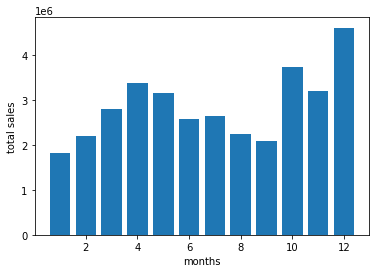

In [107]:
#creating bar graph to find best month for sales
months = range(1, 13)
plt.bar(months,y["total_sales"])
plt.ylabel("total sales")
plt.xlabel("months")
plt.show()

In [102]:
#grouping df by city
z = all_data.groupby("city_use").sum()
z

,Quantity Ordered,Price Each,month,total_sales,hour,minute
city_use,,,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58,214264,442932
Austin TX,11153,1809873.61,69829,1819581.75,141946,289060
Boston MA,22528,3637409.77,141112,3661642.01,288225,590442
Dallas TX,16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles CA,33289,5421435.23,208325,5452570.80,427444,866638
New York City NY,27932,4635370.83,175741,4664317.43,357696,733598
Portland ME,2750,447189.25,17144,449758.27,35211,72856
Portland OR,11303,1860558.22,70621,1870732.34,144421,295533
San Francisco CA,50239,8211461.74,315520,8262203.91,643265,1319477


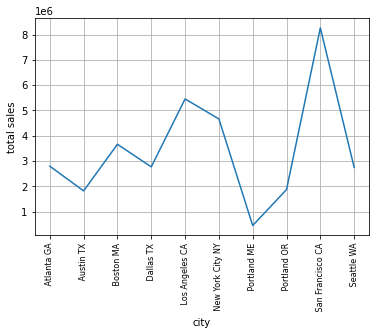

In [106]:
#creating bar graph to find best city for sales
city = [city_use for city_use, df in all_data.groupby("city_use")]
plt.plot(city,z["total_sales"])
plt.ylabel("total sales")
plt.xlabel("city")
plt.xticks(city, rotation ="vertical", size =8)
plt.grid()
plt.show()

In [76]:
#coverting order date colum to a specific format
all_data["Order Date"] =pd.to_datetime(all_data["Order Date"])

In [74]:
#creating seperate column for hour and minute
all_data["hour"] =all_data["Order Date"].dt.hour
all_data["minute"] =all_data["Order Date"].dt.minute

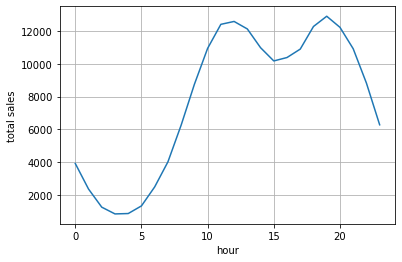

In [105]:
#plottig line chart to show sales durig various time of day
hours = [hour for hour, df in all_data.groupby("hour")]
plt.plot(hours, all_data.groupby(['hour'])['hour'].count())
plt.ylabel("total sales")
plt.xlabel("hour")
plt.grid()
plt.show()

What products are mostly sold together?

In [77]:
df =all_data[all_data["Order ID"].duplicated(keep=False)]
df["grouped"] =df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
df =df[["Order ID", "grouped"]].drop_duplicates()
df.head()

C:\Users\Saket\AppData\Local\Temp\ipykernel_7844\94280674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["grouped"] =df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [87]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df["grouped"]:
    row_list =row.split(",")
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


What product sold the most and any reason for it?

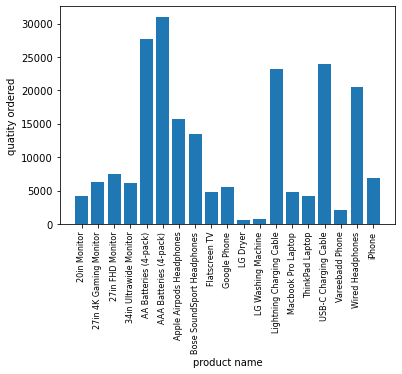

In [93]:
product_group =all_data.groupby("Product")
Quantity_Ordered =all_data.groupby("Product").sum()["Quantity Ordered"]
products = [product for product, df in product_group]
plt.bar(products,Quantity_Ordered)
plt.ylabel("quatity ordered")
plt.xlabel("product name")
plt.xticks(products, rotation ="vertical", size =8)
plt.show()

C:\Users\Saket\AppData\Local\Temp\ipykernel_7844\3663078455.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation ="vertical", size =8)


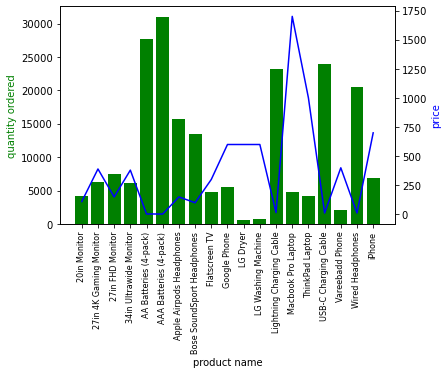

In [101]:
prices =all_data.groupby("Product").mean()["Price Each"]
fig, ax1 =plt.subplots()

ax2 =ax1.twinx()
ax1.bar(products,Quantity_Ordered, color ='g')
ax2.plot(products,prices,"b-")
ax1.set_xlabel("product name")
ax1.set_ylabel("quantity ordered", color="g")
ax2.set_ylabel("price", color ="b")
ax1.set_xticklabels(products, rotation ="vertical", size =8)
plt.show()

As we can see in the chart the graph above lie chart displays price and the green bar graph shows the quatity ordered.The relation here is inversly proportional except for few items.